In [1]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

file = "Resources/cleanest_data.csv"

clean_df = pd.read_csv(file)

In [3]:
water_df = clean_df.dropna(how = 'any')
water_df

,Unnamed: 0,County,Year,Total Population in Thousands,Population Served in Thousands,Public Self-Supply Withdrawals (Mgal/ day),Public Supply Per Capita (Gallons/Person/Day),Domestic Self-Supply Withdrawn (Mgal/day),Domestic Self-Supply Population (Thousands),"Domestic total self-supplied withdrawals plus deliveries, in Mgal/d","Domestic, Public-Supply, Gallons/Person/Day",Total Domestic Consumption (Mgal/day),"Domestic, Self-Supply, Gallons/Person/Day","Industrial, Self-Supply Withdrawn (Mgal/day)",Industrial Total Consumption (Mgal/day),"Livestock, Self-Supply, Freshwater (Mgal/day)",Livestock Consumption Freshwater (Mgal/day),"Irrigation, Crop, Self-Supply, Fresh (Mgal/day)",Irrigation Crop Consumtion Freshwater (Mgal)


In [92]:
counties = water_df["County"].drop_duplicates()
counties.count()

58

In [10]:
water_df.groupby("Year")
water_df

,Unnamed: 0,County,Year,Total Population in Thousands,Population Served in Thousands,Public Self-Supply Withdrawals (Mgal/ day),Public Supply Per Capita (Gallons/Person/Day),Domestic Self-Supply Withdrawn (Mgal/day),Domestic Self-Supply Population (Thousands),"Domestic total self-supplied withdrawals plus deliveries, in Mgal/d","Domestic, Public-Supply, Gallons/Person/Day",Total Domestic Consumption (Mgal/day),"Domestic, Self-Supply, Gallons/Person/Day","Industrial, Self-Supply Withdrawn (Mgal/day)",Industrial Total Consumption (Mgal/day),"Livestock, Self-Supply, Freshwater (Mgal/day)",Livestock Consumption Freshwater (Mgal/day),"Irrigation, Crop, Self-Supply, Fresh (Mgal/day)",Irrigation Crop Consumtion Freshwater (Mgal)
0,0,Alameda County,1985,1195.160,1153.110,NaN,NaN,3.15,42.050,122.16,103.0,NaN,75.0,3.88,2.53,NaN,NaN,NaN,NaN
1,1,Alameda County,1990,1279.180,1251.810,NaN,NaN,2.05,27.370,143.44,113.0,NaN,75.0,0.00,2.55,NaN,NaN,NaN,NaN
2,2,Alameda County,1995,1347.700,1328.650,214.56,161.0,1.43,19.050,143.45,107.0,37.30,75.0,6.75,8.29,NaN,NaN,NaN,NaN
3,3,Alameda County,2000,1443.740,1266.880,NaN,NaN,13.27,176.860,NaN,NaN,NaN,75.0,2.96,NaN,0.88,NaN,18.00,NaN
4,4,Alameda County,2005,1448.905,1433.494,156.61,109.0,3.50,15.411,76.84,51.0,NaN,227.0,0.05,NaN,0.32,NaN,NaN,NaN
5,5,Alameda County,2010,1510.271,1448.700,215.50,149.0,4.62,61.571,129.02,86.0,NaN,75.0,0.90,NaN,0.27,NaN,16.87,NaN
6,6,Alameda County,2015,1638.215,1629.900,168.74,104.0,0.49,8.315,98.86,60.0,NaN,59.0,0.90,NaN,0.27,NaN,7.64,6.55
7,7,Alpine County,1985,1.200,0.980,NaN,NaN,0.02,0.220,0.12,102.0,NaN,91.0,0.00,0.00,NaN,NaN,NaN,NaN
8,8,Alpine County,1990,1.110,0.600,NaN,NaN,0.04,0.510,0.14,167.0,NaN,78.0,0.00,0.00,NaN,NaN,NaN,NaN
9,9,Alpine County,1995,1.170,0.900,0.11,122.0,0.02,0.270,0.12,111.0,0.04,74.0,0.00,0.00,NaN,NaN,NaN,NaN


In [94]:
summary_by_county = pd.DataFrame(water_df.groupby(["County","Year"]).sum()[["Domestic total self-supplied withdrawals plus deliveries, in Mgal/d",
                                                                  "Industrial, Self-Supply Withdrawn (Mgal/day)", 
                                                                  "Industrial Total Consumption (Mgal/day)",
                                                                   "Livestock, Self-Supply, Freshwater (Mgal/day)",
                                                                   "Livestock Consumption Freshwater (Mgal/day)",
                                                                   "Irrigation, Crop, Self-Supply, Fresh (Mgal/day)",
                                                                   "Irrigation Crop Consumtion Freshwater (Mgal)"]])

summary_by_county = pd.DataFrame(summary_by_county["Domestic total self-supplied withdrawals plus deliveries, in Mgal/d"] +
                                 summary_by_county["Industrial, Self-Supply Withdrawn (Mgal/day)"] +
                                 summary_by_county["Industrial Total Consumption (Mgal/day)"] +
                                 summary_by_county["Livestock, Self-Supply, Freshwater (Mgal/day)"] +
                                 summary_by_county["Livestock Consumption Freshwater (Mgal/day)"] +
                                 summary_by_county["Irrigation, Crop, Self-Supply, Fresh (Mgal/day)"] +
                                 summary_by_county["Irrigation Crop Consumtion Freshwater (Mgal)"],
                                columns = ['Total Water Use (Mgal/day)'])

summary_by_county.head()

Total Water Use (Mgal/day)
County         Year                            
Alameda County 1985                      128.57
               1990                      145.99
               1995                      158.49
               2000                       21.84
               2005                       77.21

In [95]:
data_2010 = summary_by_county.loc[summary_by_county.index == "2010", :]
data_2010

,,Total Water Use (Mgal/day)
County,Year,


In [96]:
LA_df = pd.DataFrame(water_df.loc[water_df["County"] == 'Los Angeles County',:])

LA_agri = pd.DataFrame(LA_df["Livestock, Self-Supply, Freshwater (Mgal/day)"] + 
                                  LA_df["Livestock Consumption Freshwater (Mgal/day)"]+
                                  LA_df["Irrigation, Crop, Self-Supply, Fresh (Mgal/day)"] + 
                                  LA_df["Irrigation Crop Consumtion Freshwater (Mgal)"], 
                                  columns = ['Total Agricultural Use'], index = LA_df["Year"])

LA_df

,Unnamed: 0,County,Year,Total Population in Thousands,Population Served in Thousands,Public Self-Supply Withdrawals (Mgal/ day),Public Supply Per Capita (Gallons/Person/Day),Domestic Self-Supply Withdrawn (Mgal/day),Domestic Self-Supply Population (Thousands),"Domestic total self-supplied withdrawals plus deliveries, in Mgal/d","Domestic, Public-Supply, Gallons/Person/Day",Total Domestic Consumption (Mgal/day),"Domestic, Self-Supply, Gallons/Person/Day","Industrial, Self-Supply Withdrawn (Mgal/day)",Industrial Total Consumption (Mgal/day),"Livestock, Self-Supply, Freshwater (Mgal/day)",Livestock Consumption Freshwater (Mgal/day),"Irrigation, Crop, Self-Supply, Fresh (Mgal/day)",Irrigation Crop Consumtion Freshwater (Mgal)
126,126,Los Angeles County,1985,8105.540,7724.760,NaN,NaN,24.96,380.780,956.19,121.0,NaN,66.0,98.60,66.15,NaN,NaN,NaN,NaN
127,127,Los Angeles County,1990,8863.110,8422.120,NaN,NaN,30.27,440.990,1145.30,132.0,NaN,69.0,34.05,40.48,NaN,NaN,NaN,NaN
128,128,Los Angeles County,1995,9352.200,9313.860,1472.80,158.0,2.88,38.340,1061.26,114.0,299.46,75.0,167.29,77.02,NaN,NaN,NaN,NaN
129,129,Los Angeles County,2000,9519.340,8509.220,NaN,NaN,75.76,1010.120,NaN,NaN,NaN,75.0,57.73,NaN,2.98,NaN,51.40,NaN
130,130,Los Angeles County,2005,9935.475,9076.276,1859.63,205.0,19.10,859.199,1125.76,122.0,NaN,22.0,11.67,NaN,0.30,NaN,NaN,NaN
131,131,Los Angeles County,2010,9818.605,9242.700,1372.58,149.0,40.44,575.905,968.13,100.0,NaN,70.0,103.27,NaN,0.56,NaN,61.82,NaN
132,132,Los Angeles County,2015,10170.292,10139.981,1256.44,124.0,2.41,30.311,820.29,81.0,NaN,80.0,103.27,NaN,0.37,NaN,17.63,13.47


In [97]:
LA_df["Total Agricultural Use (MGal/day)"] = LA_df.fillna(0)["Livestock, Self-Supply, Freshwater (Mgal/day)"] + LA_df.fillna(0)["Livestock Consumption Freshwater (Mgal/day)"] + LA_df.fillna(0)["Irrigation, Crop, Self-Supply, Fresh (Mgal/day)"] + LA_df.fillna(0)["Irrigation Crop Consumtion Freshwater (Mgal)"]
LA_df["Total Industrial Use (MGal/day)"] = LA_df.fillna(0)["Industrial, Self-Supply Withdrawn (Mgal/day)"] + LA_df.fillna(0)["Industrial Total Consumption (Mgal/day)"]
agr = LA_df.columns.drop(['Unnamed: 0', 'County', 'Year', 'Total Population in Thousands',
       'Population Served in Thousands',
       'Public Self-Supply Withdrawals (Mgal/ day)',
       'Public Supply Per Capita (Gallons/Person/Day)',
       'Domestic Self-Supply Withdrawn (Mgal/day)',
       'Domestic Self-Supply Population (Thousands)',
       'Domestic total self-supplied withdrawals plus deliveries, in Mgal/d',
       'Domestic, Public-Supply, Gallons/Person/Day',
       'Total Domestic Consumption (Mgal/day)',
       'Domestic, Self-Supply, Gallons/Person/Day',
       'Livestock, Self-Supply, Freshwater (Mgal/day)',
       'Livestock Consumption Freshwater (Mgal/day)',
       'Irrigation, Crop, Self-Supply, Fresh (Mgal/day)',
       'Irrigation Crop Consumtion Freshwater (Mgal)'])
LA_df[agr] = LA_df[agr].replace(0.00, np.nan)
LA_df.head()

,Unnamed: 0,County,Year,Total Population in Thousands,Population Served in Thousands,Public Self-Supply Withdrawals (Mgal/ day),Public Supply Per Capita (Gallons/Person/Day),Domestic Self-Supply Withdrawn (Mgal/day),Domestic Self-Supply Population (Thousands),"Domestic total self-supplied withdrawals plus deliveries, in Mgal/d",...,Total Domestic Consumption (Mgal/day),"Domestic, Self-Supply, Gallons/Person/Day","Industrial, Self-Supply Withdrawn (Mgal/day)",Industrial Total Consumption (Mgal/day),"Livestock, Self-Supply, Freshwater (Mgal/day)",Livestock Consumption Freshwater (Mgal/day),"Irrigation, Crop, Self-Supply, Fresh (Mgal/day)",Irrigation Crop Consumtion Freshwater (Mgal),Total Agricultural Use (MGal/day),Total Industrial Use (MGal/day)
126,126,Los Angeles County,1985,8105.540,7724.760,NaN,NaN,24.96,380.780,956.19,...,NaN,66.0,98.60,66.15,NaN,NaN,NaN,NaN,NaN,164.75
127,127,Los Angeles County,1990,8863.110,8422.120,NaN,NaN,30.27,440.990,1145.30,...,NaN,69.0,34.05,40.48,NaN,NaN,NaN,NaN,NaN,74.53
128,128,Los Angeles County,1995,9352.200,9313.860,1472.80,158.0,2.88,38.340,1061.26,...,299.46,75.0,167.29,77.02,NaN,NaN,NaN,NaN,NaN,244.31
129,129,Los Angeles County,2000,9519.340,8509.220,NaN,NaN,75.76,1010.120,NaN,...,NaN,75.0,57.73,NaN,2.98,NaN,51.4,NaN,54.38,57.73
130,130,Los Angeles County,2005,9935.475,9076.276,1859.63,205.0,19.10,859.199,1125.76,...,NaN,22.0,11.67,NaN,0.30,NaN,NaN,NaN,0.30,11.67


In [98]:
LA_df = LA_df.rename(columns={
    "Domestic total self-supplied withdrawals plus deliveries, in Mgal/d": "Total Residential Use (MGal/day)"
                     })
LA_df = LA_df[["Year", "Total Residential Use (MGal/day)","Total Industrial Use (MGal/day)", "Total Agricultural Use (MGal/day)"]]

LA_df.set_index('Year')

,Total Residential Use (MGal/day),Total Industrial Use (MGal/day),Total Agricultural Use (MGal/day)
Year,,,
1985,956.19,164.75,NaN
1990,1145.30,74.53,NaN
1995,1061.26,244.31,NaN
2000,NaN,57.73,54.38
2005,1125.76,11.67,0.30
2010,968.13,103.27,62.38
2015,820.29,103.27,31.47


In [99]:
populations = pd.DataFrame(water_df.groupby("Year").sum()["Population Served in Thousands"])
populations

,Population Served in Thousands
Year,
1985,24345.860
1990,25476.770
1995,30466.290
2000,30059.190
2005,33424.931
2010,34777.909
2015,37709.308


In [100]:
industrial_summary = pd.DataFrame(water_df.groupby("Year").sum()[["Industrial, Self-Supply Withdrawn (Mgal/day)", 
                                                                  "Industrial Total Consumption (Mgal/day)"]])

industrial_total = pd.DataFrame(industrial_summary["Industrial, Self-Supply Withdrawn (Mgal/day)"] +
                                industrial_summary["Industrial Total Consumption (Mgal/day)"],
                                columns = ['Total Industrial Use (Mgal/day)'])

industrial_total

,Total Industrial Use (Mgal/day)
Year,
1985,1005.56
1990,255.63
1995,822.74
2000,201.91
2005,95.67
2010,399.97
2015,398.55


In [101]:
agri_summary = pd.DataFrame(water_df.groupby("Year").sum()[["Livestock, Self-Supply, Freshwater (Mgal/day)",
                                                            "Livestock Consumption Freshwater (Mgal/day)",
                                                            "Irrigation, Crop, Self-Supply, Fresh (Mgal/day)",
                                                            "Irrigation Crop Consumtion Freshwater (Mgal)"]])

agri_total = pd.DataFrame(agri_summary["Livestock, Self-Supply, Freshwater (Mgal/day)"] + 
                                  agri_summary["Livestock Consumption Freshwater (Mgal/day)"]+
                                  agri_summary["Irrigation, Crop, Self-Supply, Fresh (Mgal/day)"] + 
                                  agri_summary["Irrigation Crop Consumtion Freshwater (Mgal)"], 
                                  columns = ['Total Agricultural Use (Mgal/day)'])

agri_total

,Total Agricultural Use (Mgal/day)
Year,
1985,0.00
1990,0.00
1995,0.00
2000,30756.15
2005,196.62
2010,23031.22
2015,33648.03


In [102]:
residential_total = pd.DataFrame(water_df.groupby("Year").sum()
                                 ["Domestic total self-supplied withdrawals plus deliveries, in Mgal/d"])

residential_total = residential_total.rename(columns = {"Domestic total self-supplied withdrawals plus deliveries, in Mgal/d" :
                                                        "Total Residential Use (Mgal/day)"})

residential_total

,Total Residential Use (Mgal/day)
Year,
1985,3378.87
1990,4058.13
1995,3830.97
2000,0.00
2005,4469.50
2010,4037.56
2015,3354.71


In [103]:
data_frames = [populations, residential_total, industrial_total, agri_total]
total_data = reduce(lambda  left,right: pd.merge(left,right,on=['Year'],
                                            how='outer'), data_frames)

total_data = total_data.replace(0.00, np.nan)
total_data

,Population Served in Thousands,Total Residential Use (Mgal/day),Total Industrial Use (Mgal/day),Total Agricultural Use (Mgal/day)
Year,,,,
1985,24345.860,3378.87,1005.56,NaN
1990,25476.770,4058.13,255.63,NaN
1995,30466.290,3830.97,822.74,NaN
2000,30059.190,NaN,201.91,30756.15
2005,33424.931,4469.50,95.67,196.62
2010,34777.909,4037.56,399.97,23031.22
2015,37709.308,3354.71,398.55,33648.03


In [104]:
LA_df

,Year,Total Residential Use (MGal/day),Total Industrial Use (MGal/day),Total Agricultural Use (MGal/day)
126,1985,956.19,164.75,NaN
127,1990,1145.30,74.53,NaN
128,1995,1061.26,244.31,NaN
129,2000,NaN,57.73,54.38
130,2005,1125.76,11.67,0.30
131,2010,968.13,103.27,62.38
132,2015,820.29,103.27,31.47


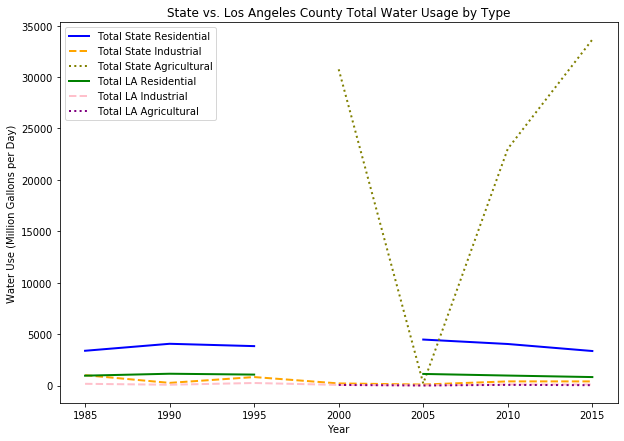

In [105]:
# multiple line plot to compare usage by each sector over the years

plt.figure(figsize =(10,7))
years = ["1985", "1990", "1995", "2000", "2005", "2010", "2015"]

plt.plot(years, total_data["Total Residential Use (Mgal/day)"], marker='', linestyle = '-' , 
         color='blue', linewidth=2, label = "Total State Residential")
plt.plot(years, total_data["Total Industrial Use (Mgal/day)"], marker='', linestyle = '--', 
         color='orange', linewidth=2, label = "Total State Industrial")
plt.plot(years, total_data["Total Agricultural Use (Mgal/day)"], marker='', linestyle = ':', 
         color='olive', linewidth=2, label = "Total State Agricultural")

plt.plot(years, LA_df["Total Residential Use (MGal/day)"], marker='', linestyle = '-' , 
         color='green', linewidth=2, label = "Total LA Residential")
plt.plot(years, LA_df["Total Industrial Use (MGal/day)"], marker='', linestyle = '--', 
         color='pink', linewidth=2, label = "Total LA Industrial")
plt.plot(years, LA_df["Total Agricultural Use (MGal/day)"], marker='', linestyle = ':', 
         color='purple', linewidth=2, label = "Total LA Agricultural")

plt.legend()
plt.title ("State vs. Los Angeles County Total Water Usage by Type")
plt.xlabel("Year")
plt.ylabel("Water Use (Million Gallons per Day)")

plt.show()

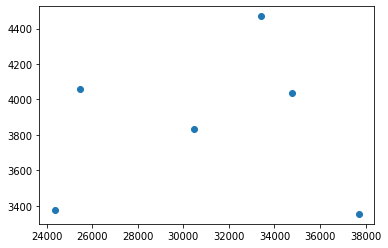

In [106]:
plt.scatter(total_data["Population Served in Thousands"], total_data["Total Residential Use (Mgal/day)"], )

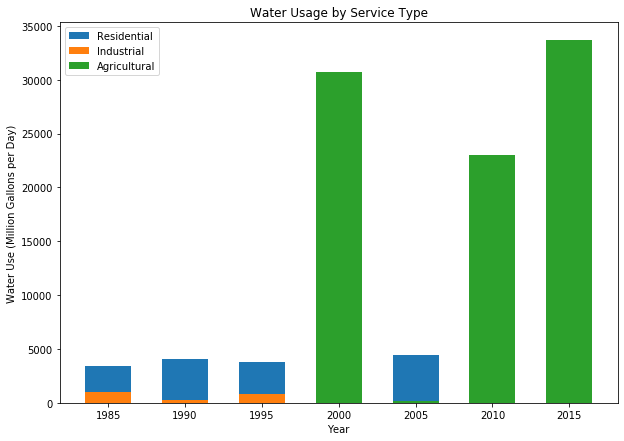

In [109]:
ind = total_data.index 
width = 3      

plt.figure(figsize =(10,7))
p1 = plt.bar(ind, total_data["Total Residential Use (Mgal/day)"], width)
p2 = plt.bar(ind, total_data["Total Industrial Use (Mgal/day)"], width)
p3 = plt.bar(ind, total_data["Total Agricultural Use (Mgal/day)"], width)

plt.xlabel("Year")
plt.ylabel("Water Use (Million Gallons per Day)")
plt.title("Water Usage by Service Type")
plt.legend((p1[0], p2[0],p3[0]), ('Residential', 'Industrial', 'Agricultural'), loc = 'upper left')

plt.show()